In [8]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## Central limit theorem
Central limit theorem, the larger the sample size the closer you get to true mean. Here we create a random distributed samples with mu=0 var=1.

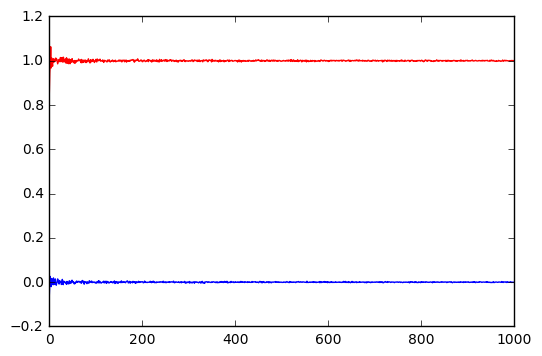

In [15]:
means = []
variances = []
for i in xrange(100,1000000,1000):
    X1 = stats.norm.rvs(size = i)
    means.append( np.mean(X1) )
    variances.append( np.var(X1) )
plt.plot(means, 'b')
plt.plot(variances, 'r')
plt.show()

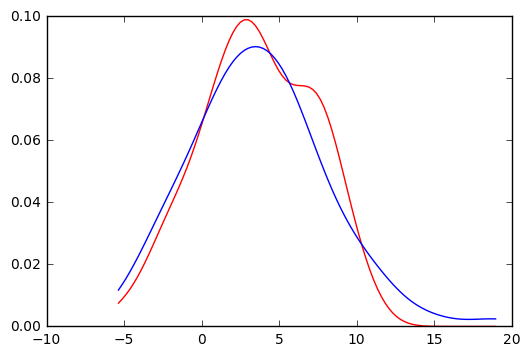

In [30]:
# Random variables with normal distro with mean=3, variance=4
X1 = stats.norm.rvs(size = 100, loc=3, scale=4)
X1_kde = stats.kde.gaussian_kde(X1)

X2 = stats.norm.rvs(size = 100, loc=3.1, scale=4)
X2_kde = stats.kde.gaussian_kde(X2)

x = np.linspace( min(min(X1), min(X2)), max(max(X1), max(X2)), 100  )

plt.plot(x, X1_kde(x), 'r')
plt.plot(x, X2_kde(x), 'b')
plt.show()

In [34]:
# Do a 2 sample KS test 
# we have two populations to compare as opposed to comparing one population to a known distribution

(D, pv) = stats.ks_2samp(X1, X2)
print (D, pv)
(D, pv) = stats.ks_2samp(X2, X1)
(D, pv)

# So it is symmetric!

(0.069999999999999979, 0.96101820420866746)


(0.069999999999999979, 0.96101820420866746)

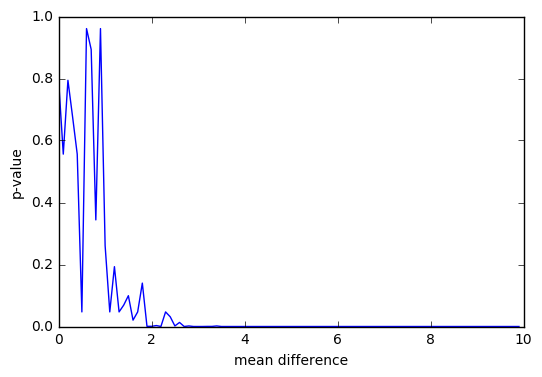

In [46]:
# What happens if we move the mean slightly and do KS test continously?
m1 = 3
v1 = 4
X1 = stats.norm.rvs(size = 100, loc=m1, scale=v1)
results_m = []
for i in xrange(0,100):
    m = m1 + i/10.0
    X2 = stats.norm.rvs(size = 100, loc=m, scale=v1)
    (D, pv) = stats.ks_2samp(X1, X2)
    results_m.append([m-m1, pv])

results_m = np.array(results_m)
plt.plot(results_m[:,0], results_m[:,1])
plt.xlabel('mean difference')
plt.ylabel('p-value')
plt.show()

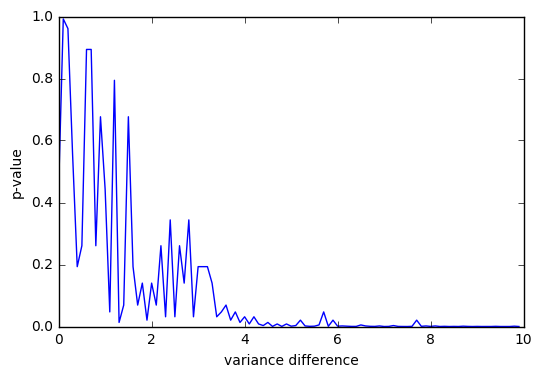

In [48]:
# What happens if we move the variance slightly and do KS test continously?
m1 = 3
v1 = 4
X1 = stats.norm.rvs(size = 100, loc=m1, scale=v1)
results_v = []
for i in xrange(0,100):
    v = v1 + i/10.0
    X2 = stats.norm.rvs(size = 100, loc=m1, scale=v)
    (D, pv) = stats.ks_2samp(X1, X2)
    results_v.append([v-v1, pv])

results_v = np.array(results_v)
plt.plot(results_v[:,0], results_v[:,1])
plt.xlabel('variance difference')
plt.ylabel('p-value')
plt.show()

# What is p-value anyway???

P values evaluate how well the sample data support the devil’s advocate argument that the null hypothesis is true. It measures how compatible your data are with the null hypothesis. How likely is the effect observed in your sample data if the null hypothesis is true?

* High P values: your data are likely with a true null.
* Low P values: your data are unlikely with a true null.

A low P value suggests that your sample provides enough evidence that you can reject the null hypothesis for the entire population.

For example, suppose that a vaccine study produced a P value of 0.04. This P value indicates that if the vaccine had no effect, you’d obtain the observed difference or more in 4% of studies due to random sampling error.

From: http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-correctly-interpret-p-values

In [50]:
# Actually let's put this in a accuracy domain, let's say:
# X1 has a mean accuracy of 95 with variance 1
# X2 has a mean accuracy of 97 with variance 2

X1 = stats.norm.rvs(size = 100, loc=95, scale=1)
X2 = stats.norm.rvs(size = 100, loc=97, scale=2)

# Run KS
(ks_stat, pvalue_ks) = stats.ks_2samp(X1, X2)
print "KS Statistic = ", ks_stat
print "p-value (KS) = ", pvalue_ks

# Run t-test (2 sample, related)
(t_stat, pvalue_t) = stats.ttest_rel(X1, X2)
print "T Statistic      = ", t_stat
print "p-value (T-test) = ", pvalue_t

KS Statistic =  0.47
p-value (KS) =  2.16825856737e-10
T Statistic      =  -8.0059492603
p-value (T-test) =  2.33090365548e-12


### stats.ttest_rel documentation says...

If we observe a large p-value, for example greater than 0.05 or 0.1 then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages. Small p-values are associated with large t-statistics.

In [52]:
# Can I do KS or t-test on samples with of different sizes?
Xa = stats.norm.rvs(size = 100, loc=95, scale=1)
Xb = stats.norm.rvs(size = 1000, loc=90, scale=2)

# Run KS
stats.ks_2samp(Xa, Xb) # Yep!
# Run T-test
stats.ttest_rel(Xa, Xb) # Nope! It is related, remember?

ValueError: unequal length arrays